In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# reading the dataset
data=pd.read_csv("/content/Iris.csv")

In [ ]:
data.shape

(150, 6)

In [ ]:
# finding the uniques values in the targert variable
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# lable encoding the target variable
label_encoder = preprocessing.LabelEncoder()
data['Species']= label_encoder.fit_transform(data['Species'])

data['Species'].unique()

array([0, 1, 2])

In [ ]:
# getting the statistical summary of the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Normalizing the data using min-max scaler

last_col = data.iloc[:, -1]

new_df = pd.DataFrame()
new_df['Species'] = last_col

numeric_columns = data.select_dtypes(include=[float, int]).columns
features_to_normalize = data[numeric_columns]

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features_to_normalize)

df = pd.DataFrame(scaled_features, columns=features_to_normalize.columns)

df['Species'] = new_df


In [ ]:
# finding the statistical summary of normalized data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.50000,0.428704,0.439167,0.467571,0.457778,1.000000
std,0.29158,0.230018,0.180664,0.299054,0.317984,0.819232
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.25000,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.50000,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.75000,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
# seperating the dependent and independent variable

X=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(X.shape)
y.shape

(150, 5)


(150,)

In [ ]:
# splitting the data in the ratio of 70 for training and 30 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f'accuracy: {acc}')
print(f'classification report: {report}')

accuracy: 1.0
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# scaling the training and test features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# defining various machine learning algorithms
logistic_classifier = LogisticRegression(random_state=42)
tree_classifier = DecisionTreeClassifier(random_state=42)
forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(kernel='rbf', C=1.0)
nn_classifier = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# creating an ensemble model of all the defined ML algorithms for the classification task
ensemble_model = VotingClassifier(
    estimators=[
        ('logistic', logistic_classifier),
        ('tree', tree_classifier),
        ('forest', forest_classifier),
        ('SVM', svm_classifier),
        ('neural_network', nn_classifier)
    ],
    voting='hard'
)

# training our ensemble model on train data
ensemble_model.fit(X_train, y_train)

# testing on test data
y_pred = ensemble_model.predict(X_test)

# evaluating the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



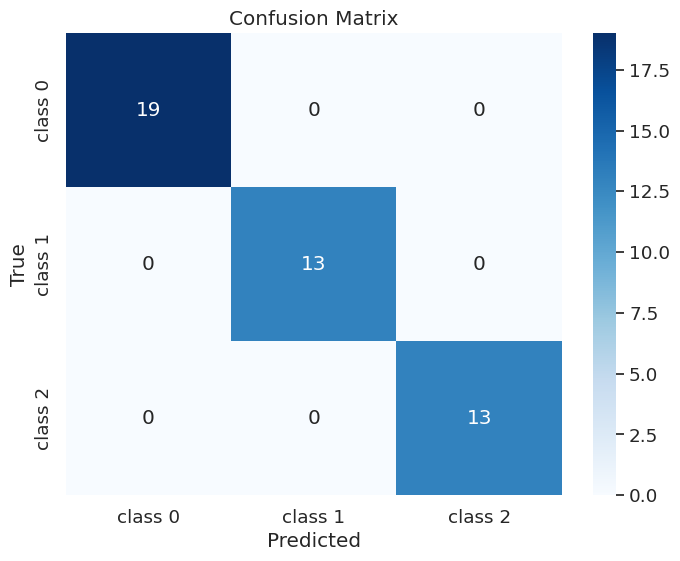

In [ ]:
# plotting the confusion matrix

class_labels = ['class 0','class 1', 'class 2']

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
